## Prediction model for profit of 50_startups data.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Data
startups = pd.read_csv('50_startups.csv')

In [3]:
startups.head(10)

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96

### EDA

In [4]:
startups.shape

(50, 5)

In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startups.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [7]:
startups1=startups.rename({'R&D Spend':'RD_spend','Marketing Spend':'Marketing_spend'},axis=1)
startups1

RD_spend  Administration  Marketing_spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [8]:
startups1.isna().sum()

RD_spend           0
Administration     0
Marketing_spend    0
State              0
Profit             0
dtype: int64

### correlation analysis

In [9]:
#Checking collinearity between i/p variables
startups1.corr()

RD_spend  Administration  Marketing_spend    Profit
RD_spend         1.000000        0.241955         0.724248  0.972900
Administration   0.241955        1.000000        -0.032154  0.200717
Marketing_spend  0.724248       -0.032154         1.000000  0.747766
Profit           0.972900        0.200717         0.747766  1.000000

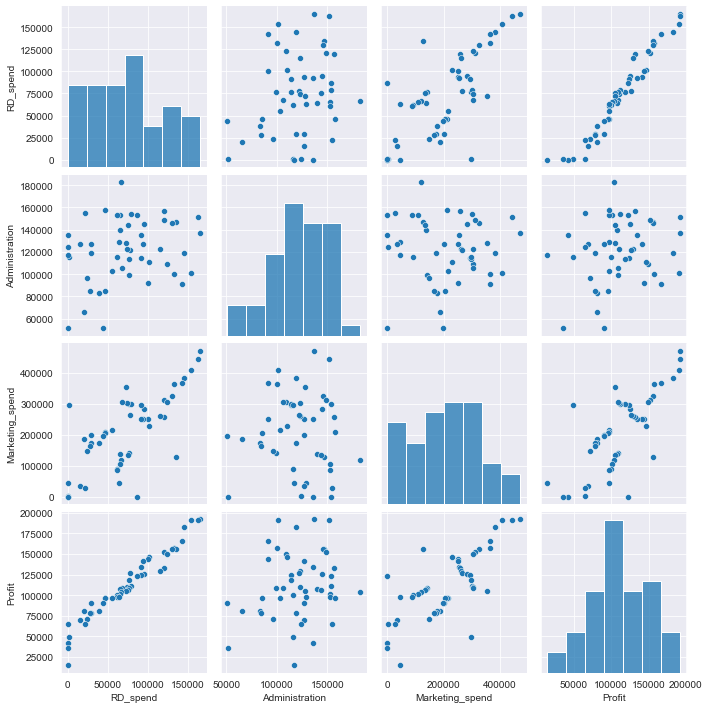

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(startups1)

### Building model

In [11]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD_spend+Administration+Marketing_spend', data = startups1).fit()

### Model testing

In [12]:
model.params

Intercept          50122.192990
RD_spend               0.805715
Administration        -0.026816
Marketing_spend        0.027228
dtype: float64

In [13]:
#Checking T-values and p-values
np.round(model.tvalues, 4), np.round(model.pvalues, 4)

(Intercept           7.6262
 RD_spend           17.8464
 Administration     -0.5255
 Marketing_spend     1.6551
 dtype: float64,
 Intercept          0.0000
 RD_spend           0.0000
 Administration     0.6018
 Marketing_spend    0.1047
 dtype: float64)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        17:48:52   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Build SLR and MLR models for insignificant variables

In [16]:
model_M = smf.ols('Profit~ Marketing_spend', data= startups1).fit()

In [17]:
model_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           4.38e-10
Time:                        17:48:52   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model_A = smf.ols('Profit~ Administration', data= startups1).fit()

In [19]:
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.162
Time:                        17:48:52   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_AM = smf.ols('Profit~ Administration+Marketing_spend', data= startups1).fit()

In [21]:
model_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           2.50e-10
Time:                        17:48:52   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Validation Techniques

In [22]:
#1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r = smf.ols('RD_spend~ Administration+Marketing_spend', data=startups1).fit().rsquared
vif_r = 1/(1-rsq_r)

rsq_a = smf.ols('Administration ~ RD_spend+Marketing_spend', data=startups1).fit().rsquared
vif_a = 1/(1-rsq_a)

rsq_m = smf.ols('Marketing_spend~ RD_spend+Administration', data=startups1).fit().rsquared
vif_m = 1/(1-rsq_m)

d1 = {'Varriables':['RD_spend','Administration','Marketing_spend'], 'Vif':[vif_r,vif_a,vif_m]}
vif_df= pd.DataFrame(d1)
vif_df

Varriables       Vif
0         RD_spend  2.468903
1   Administration  1.175091
2  Marketing_spend  2.326773

In [23]:
#All variables have VIF less than 20 therefore no multicollinerity in variables
#so we will consider all the variables in model building

In [24]:
#2)Residual Analysis
#Test for Normality of Residuals Q-Q plot

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


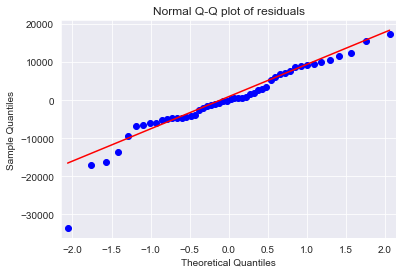

In [25]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [26]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [27]:
list(np.where(model.resid<-.10))

[array([ 0,  4,  5,  6,  7,  9, 14, 15, 17, 18, 21, 22, 23, 24, 26, 27, 29,
        31, 32, 33, 39, 46, 47, 48, 49], dtype=int64)]

In [28]:
#Test for Homoscedasticity

def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

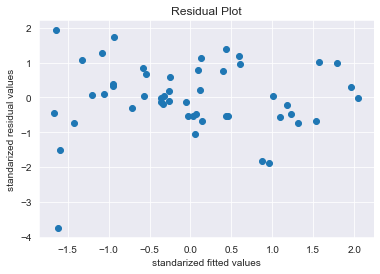

In [29]:
#Residual plot for  Homoscedasticity
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()

In [30]:
#Test for errors
#using residual regression plot code
#graphics.plot_regress_exog(model,'x',fig)
#exog = x variable and endog = y variable

<function matplotlib.pyplot.show(close=None, block=None)>

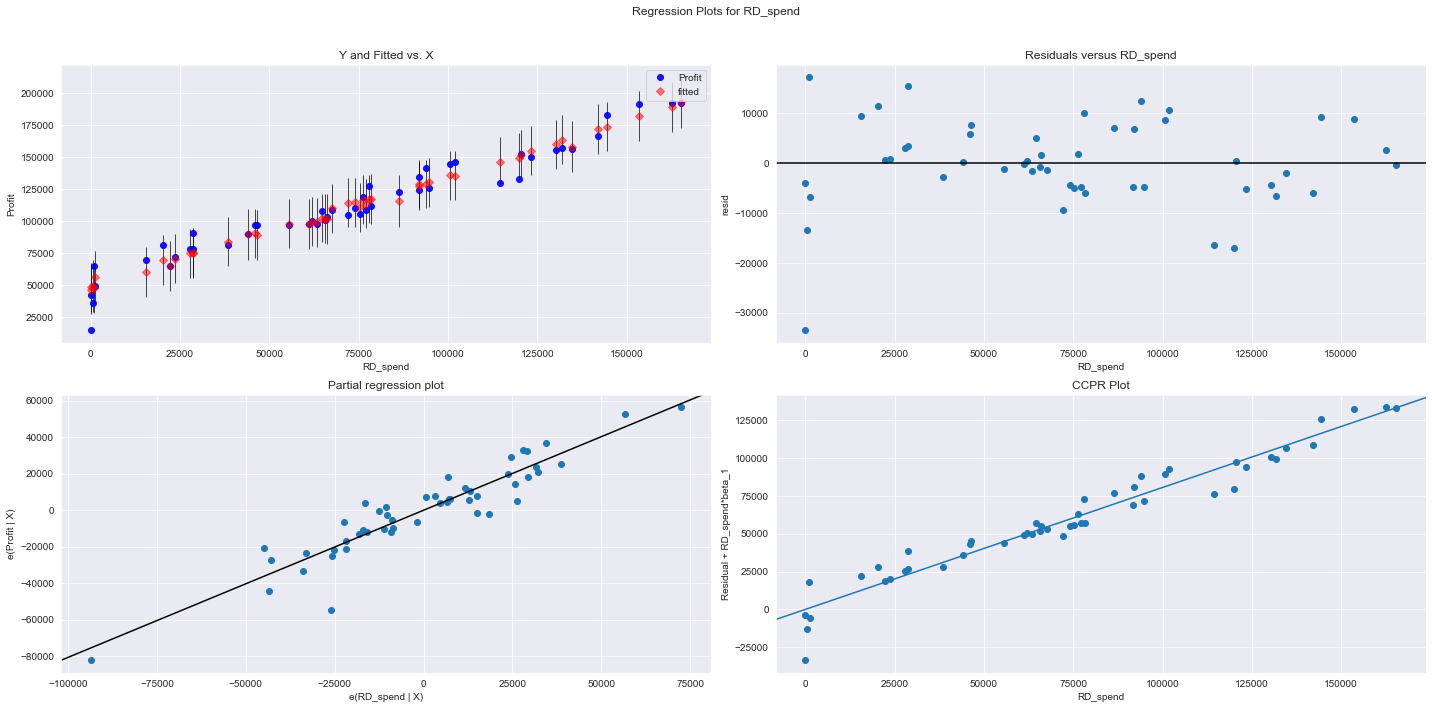

In [31]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'RD_spend', fig=fig)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

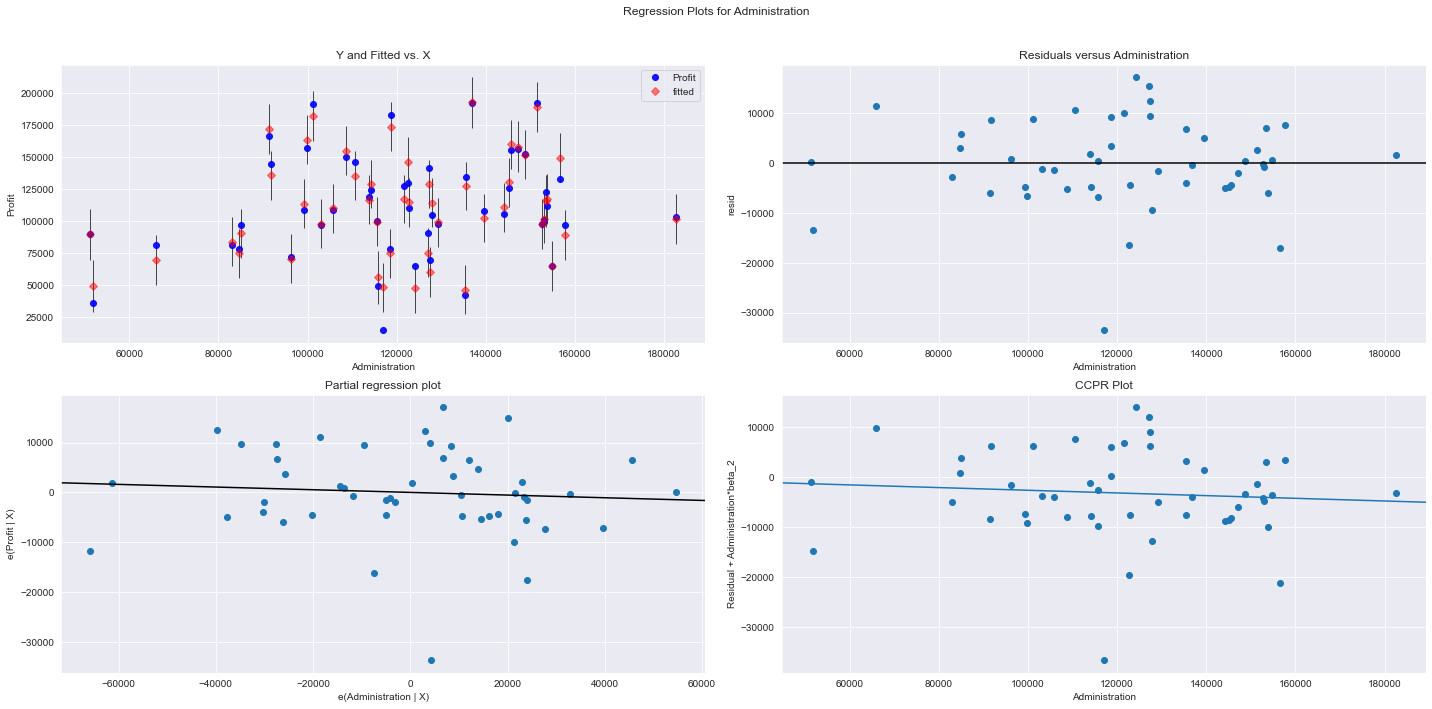

In [32]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'Administration', fig=fig)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

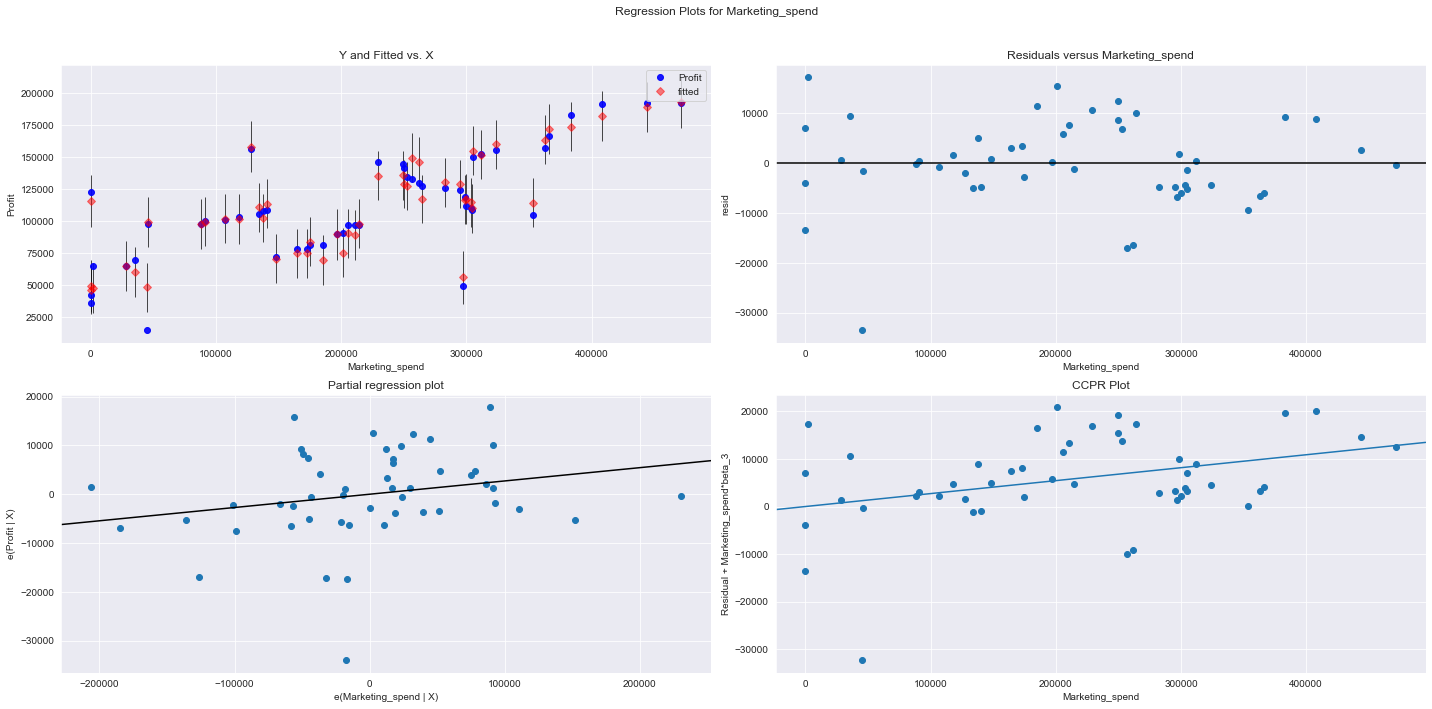

In [33]:
fig = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model,'Marketing_spend', fig=fig)
plt.show

In [34]:
#Detecting Outliers/influencers
#cook's distance

In [35]:
model.influence = model.get_influence()
(c, _) = model.get_influence().cooks_distance

In [36]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

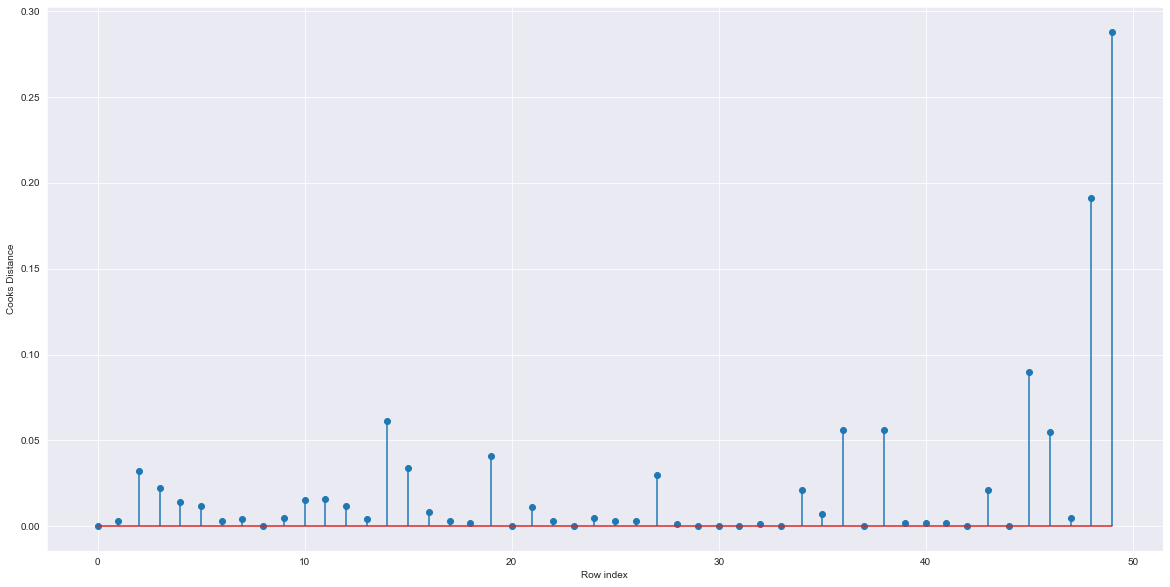

In [37]:
#PLot cook's distance plot
fig = plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(startups1)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
np.argmax(c), np.max(c)

(49, 0.2880822927543267)

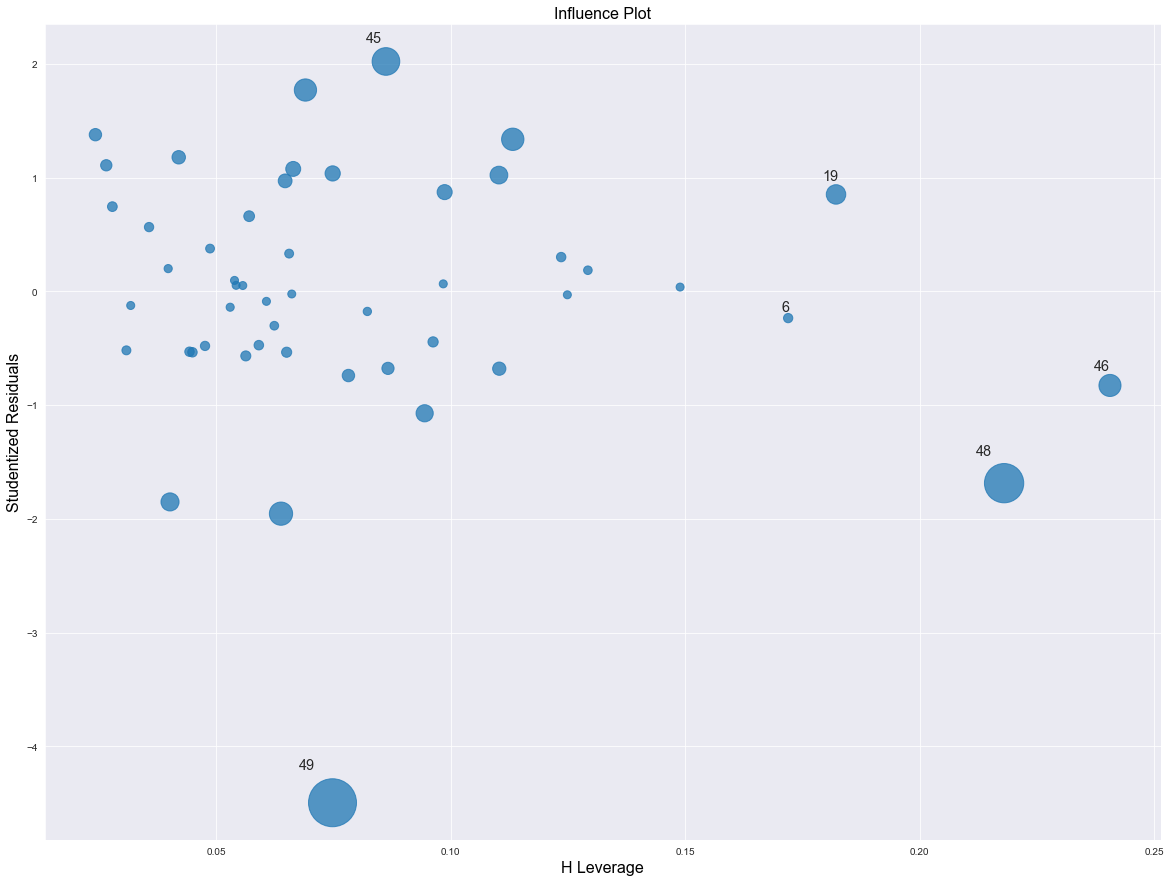

In [39]:
#Influrnce plot

from statsmodels.graphics.regressionplots import influence_plot
fig,ax = plt.subplots(figsize=(20,15))
influence_plot(model, ax=ax)
plt.show()

In [40]:
k = startups1.shape[1]
n = startups1.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [41]:
leverage_cutoff

0.36

In [42]:
startups1[startups1.index.isin([49])]

RD_spend  Administration  Marketing_spend       State   Profit
49       0.0        116983.8         45173.06  California  14681.4

In [43]:
startups1.tail()

RD_spend  Administration  Marketing_spend       State    Profit
45   1000.23       124153.04          1903.93    New York  64926.08
46   1315.46       115816.21        297114.46     Florida  49490.75
47      0.00       135426.92             0.00  California  42559.73
48    542.05        51743.15             0.00    New York  35673.41
49      0.00       116983.80         45173.06  California  14681.40

### Improving the model

In [44]:
#singnificant difference in 49th record so it's outlier and drop it
startups1_new = startups1
startups1_new = startups1_new.drop(startups1_new.index[[49]],axis=0)
startups1_new.tail()

RD_spend  Administration  Marketing_spend       State    Profit
44  22177.74       154806.14         28334.72  California  65200.33
45   1000.23       124153.04          1903.93    New York  64926.08
46   1315.46       115816.21        297114.46     Florida  49490.75
47      0.00       135426.92             0.00  California  42559.73
48    542.05        51743.15             0.00    New York  35673.41

In [45]:
startups1_new

RD_spend  Administration  Marketing_spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41

### Rebuilding model

In [46]:
model1 = smf.ols('Profit~RD_spend+Administration+Marketing_spend', data = startups1_new).fit()

In [47]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           8.85e-32
Time:                        17:48:55   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD_spend            0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
(c1, _)= model1.get_influence().cooks_distance
c1

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

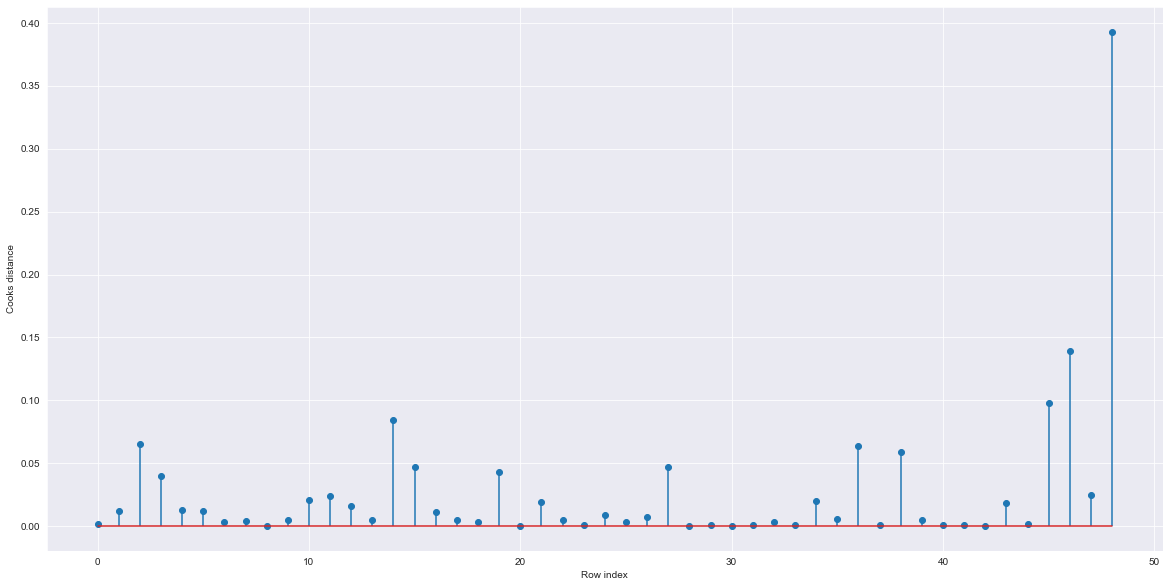

In [49]:
fig = plt.subplots(figsize=(20, 10))
plt.stem(np.arange(len(startups1_new)), np.round(c1,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [50]:
np.argmax(c1), np.max(c1)

(48, 0.3927442055632118)

In [51]:
#leverage cutoff value
leverage_cutoff = 3*((4 + 1)/49)
leverage_cutoff

0.30612244897959184

In [52]:
#droping 48th record coz it's outliers
startups1_new[startups1_new.index.isin([48])]

RD_spend  Administration  Marketing_spend     State    Profit
48    542.05        51743.15              0.0  New York  35673.41

In [53]:
startups1_new = startups1_new.drop(startups1_new.index[[48]],axis=0)

In [54]:
startups1_new.tail()

RD_spend  Administration  Marketing_spend       State    Profit
43  15505.73       127382.30         35534.17    New York  69758.98
44  22177.74       154806.14         28334.72  California  65200.33
45   1000.23       124153.04          1903.93    New York  64926.08
46   1315.46       115816.21        297114.46     Florida  49490.75
47      0.00       135426.92             0.00  California  42559.73

In [55]:
#Again Rebuilding model

model2 = smf.ols('Profit~RD_spend+Administration+Marketing_spend', data = startups1_new).fit()

In [56]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           2.03e-31
Time:                        17:52:30   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD_spend            0.7895      0.036     21.718      0.000       0.716       0.863
Administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing_spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
(c2, _)= model2.get_influence().cooks_distance
c2

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

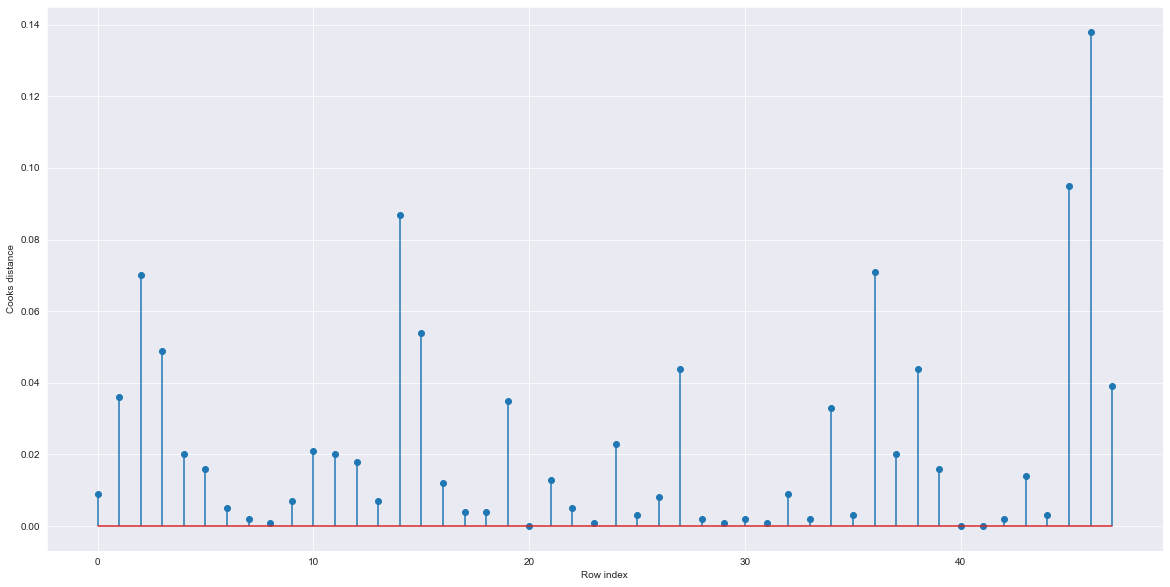

In [58]:
ig = plt.subplots(figsize=(20, 10))
plt.stem(np.arange(len(startups1_new)), np.round(c2,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [59]:
np.argmax(c2), np.max(c2)

(46, 0.13829133994334533)

In [60]:
leverage_cutoff = 3*((4 + 1)/48)
leverage_cutoff

0.3125

In [61]:
df2 ={'Model Name':['Model','Model1','Model2'],'Rsquared values': [model.rsquared,model1.rsquared,model2.rsquared]}

In [62]:
table=pd.DataFrame(df2)
table

Model Name  Rsquared values
0      Model         0.950746
1     Model1         0.961316
2     Model2         0.962677

In [63]:
#From table model2 has highest Rsquared value
#we use model2 for prediction

### Model Prediction

In [64]:
pred_data= pd.DataFrame({'RD_spend':[175000,180000,190000],'Administration':[110000,125000,115000],'Marketing_spend':[220000,280000,250000]})

In [65]:
pred_data

RD_spend  Administration  Marketing_spend
0    175000          110000           220000
1    180000          125000           280000
2    190000          115000           250000

In [66]:
model2.predict(pred_data)

0    194008.636669
1    198019.567979
2    206041.165490
dtype: float64